In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# Add url
url = "https://en.wikipedia.org/wiki/List_of_legal_entity_types_by_country#United_States"
r = requests.get(url)

In [3]:
# Initiate beautiful and list element to extract all the rows in the table
soup = BeautifulSoup(r.content, "html.parser")
table = soup.find_all('table')[13]
print("table is ", table)
rows = table.find_all('tr')
row_list = list()

table is  <table class="wikitable" style="margin:auto; border:#88a; background:#f7f8ff; padding:5px; font-size:95%; text-align:center;">
<caption>Required designations for corporations, by U.S. state, territory or commonwealth:
</caption>
<tbody><tr style="background:#ccf; border:1px solid #88a; vertical-align:bottom;">
<td style="width: 10%;">State, territory or commonwealth
</td>
<td>Required in corporation name
</td>
<td style="width: 20%;">Authority
</td></tr>
<tr>
<td><a href="/wiki/Alabama" title="Alabama">Alabama</a></td>
<td>"corporation", or "incorporated", or an abbreviation of one of such words, or if a banking corporation the words "bank", "banking", or "bankers"</td>
<td>§ 10-2B-4.01(a)(1) Code of Alabama 1975
</td></tr>
<tr>
<td><a href="/wiki/Alaska" title="Alaska">Alaska</a></td>
<td>"corporation", "company", "incorporated", or "limited", or an abbreviation of one of these words; may not contain the word "city", "borough", or "village" or otherwise imply that the corpor

In [4]:
# Iterate through all of the rows in table and get through each of the cell to append it into rows and row_list
for tr in rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    row_list.append(row)
    print("Row is ", row)

Row is  ['State, territory or commonwealth\n', 'Required in corporation name\n', 'Authority\n']
Row is  ['Alabama', '"corporation", or "incorporated", or an abbreviation of one of such words, or if a banking corporation the words "bank", "banking", or "bankers"', '§ 10-2B-4.01(a)(1) Code of Alabama 1975\n']
Row is  ['Alaska', '"corporation", "company", "incorporated", or "limited", or an abbreviation of one of these words; may not contain the word "city", "borough", or "village" or otherwise imply that the corporation is a municipality.', '§ 10.06.105 (a) and (b), Alaska Corporations Code\n']
Row is  ['Arizona', '"association", "bank", "company", "corporation", "limited" or "incorporated" or an abbreviation of one of these words or the equivalent in a foreign language. Corporation may not use "bank", "deposit", "credit union", "trust" or "trust company" unless it also has a license to operate one. May not use "limited liability company" or "limited company" or the abbreviations "L.L.C.

In [20]:
# Create pandas dataframe
df = pd.DataFrame(row_list,columns=['State, territory or commonwealth','Required in corporation name','Authority'])
df.set_index('State, territory or commonwealth',inplace=True)
df = df.iloc[1:]

In [21]:
df.head(10)

,Required in corporation name,Authority
"State, territory or commonwealth",,
Alabama,"""corporation"", or ""incorporated"", or an abbrev...",§ 10-2B-4.01(a)(1) Code of Alabama 1975\n
Alaska,"""corporation"", ""company"", ""incorporated"", or ""...","§ 10.06.105 (a) and (b), Alaska Corporations C..."
Arizona,"""association"", ""bank"", ""company"", ""corporation...",§ 10-401 Arizona Revised Statutes\n
Arkansas,"""Corporation"", ""Company"", or ""Incorporated"", ""...","§ 4-26-401 (1), Arkansas Code\n"
California,"""corporation"", ""incorporated"" or ""limited"" or ...","§ 202(a), California Corporations Code\n"
Colorado,"""corporation"", ""incorporated"", ""company"", ""lim...","§ 7-90-601, Colorado Revised Statutes\n"
Connecticut,"""corporation"", ""incorporated"", ""company"", ""Soc...",§ 33-655 General Statutes of Connecticut\n
Delaware,"""association"", ""company"", ""corporation"", ""club...","Title 8, § 102, Delaware Code\n"
District of Columbia,"""corporation"", ""company"", ""incorporated"", or ""...",§ 29–101.08 District of Columbia Official Code\n


In [18]:
# Export the data into csv
df.to_csv('legalentities_usa.csv')

In [13]:
# Import libraries for text preprocessing and word cloud
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [14]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Obtain additional stopwords from nltk

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [16]:
# Remove stopwords and remove words with less than 3 characters

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 5 and token not in stop_words:
            result.append(token)            
    return result

In [17]:
# Open the legalentities_usa.csv file and show the most common words per classification in a word cloud

def most_common_words(file):
    
    # Read file into df dataframe
    df = pd.read_csv(file)
    df['clean'] = df['Required in corporation name'].apply(preprocess) # Apply the preprocess function to the dataframe
    df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x)) # Transform word vectors into joined text

    # plot the word cloud
    plt.figure(figsize = (20,20)) 
    wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df.clean_joined))
    plt.imshow(wc, interpolation = 'bilinear')

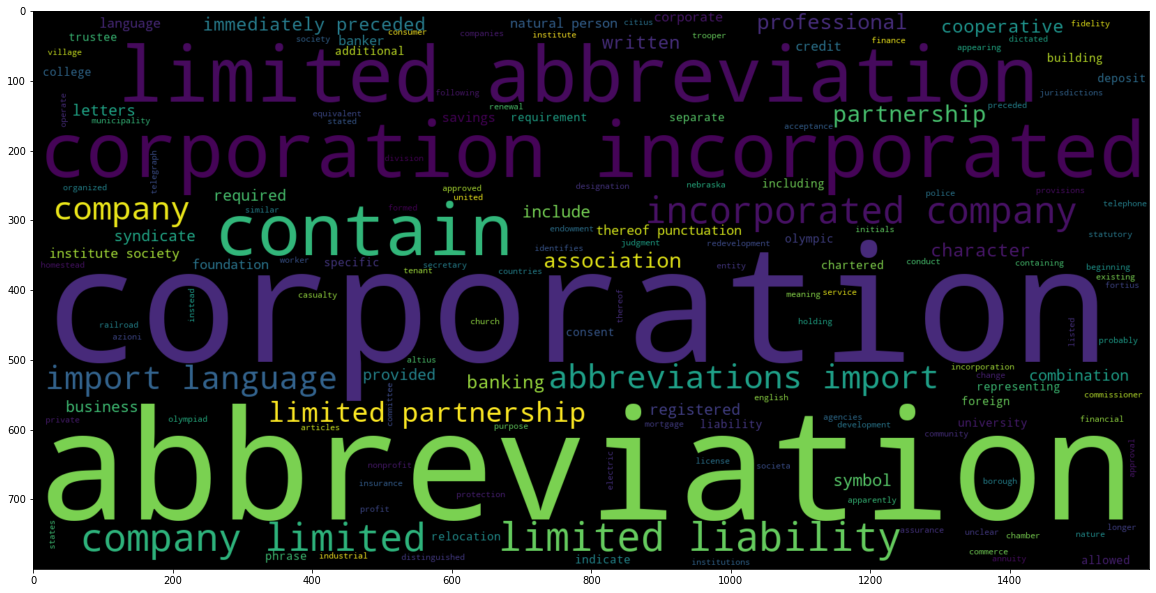

In [19]:
most_common_words('legalentities_usa.csv')